In [1]:
import geopandas as gpd

<AxesSubplot:>

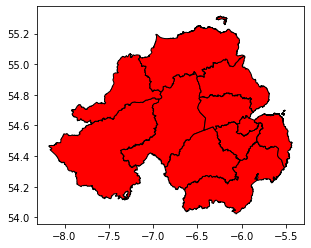

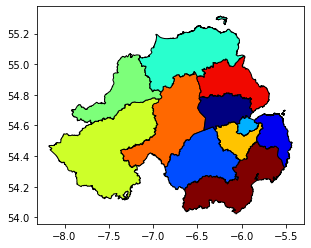

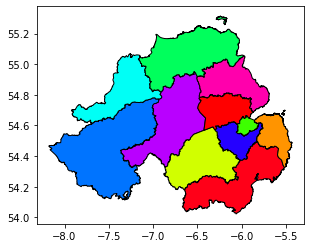

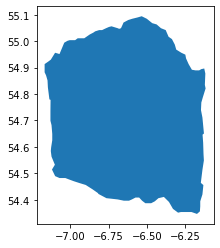

In [2]:
#Importing an esri shapefile and plotting it using geopandas
districts = gpd.read_file(r'C:\Users\OLADEJI\Documents\TUTORIAL2SPYDER\Shapefiles\districts.shp')
districts.plot(color = 'red', edgecolor = 'black')
districts.plot(cmap = 'jet', edgecolor = 'black', column = 'district')
districts.plot(cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest = gpd.read_file(r'C:\Users\OLADEJI\Documents\TUTORIAL2SPYDER\Shapefiles\area_of_interest.shp')
area_of_interest.plot()

<AxesSubplot:>

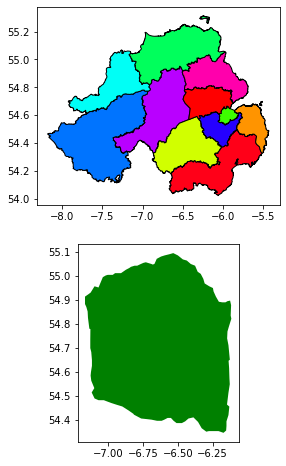

In [3]:
#plot the figures side by side
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (10,8))
districts.plot(ax = ax1,cmap = 'hsv', edgecolor = 'black', column = 'district' )
area_of_interest.plot(ax = ax2, color = 'green')

<AxesSubplot:>

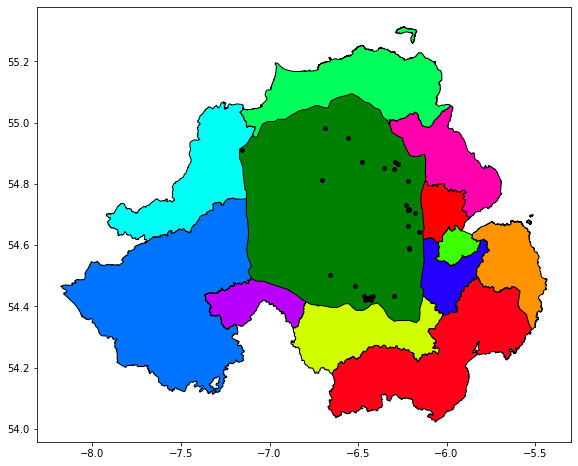

In [4]:
#plotting multiple layers
fig, ax = plt.subplots(figsize = (10,8))
districts.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest.plot(ax = ax, color = 'green')
area_of_interest.plot(ax = ax, color = 'none', edgecolor = 'black')
atms = gpd.read_file(r'C:\Users\OLADEJI\Documents\TUTORIAL2SPYDER\Shapefiles\atms.shp')
atms.plot(ax = ax, color = 'black', markersize = 14)

<AxesSubplot:>

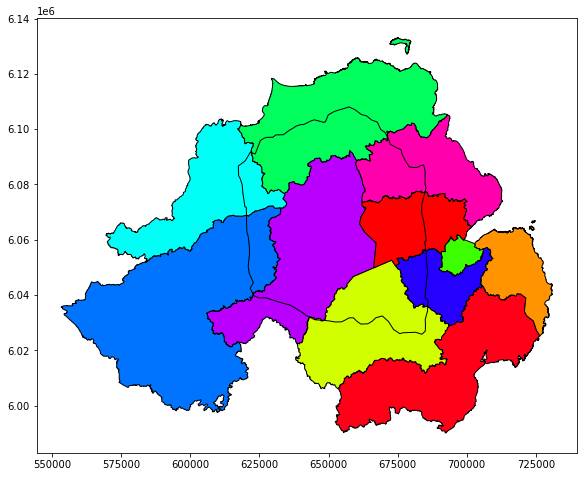

In [5]:
#Reprojecting geopandas geodataframe
#plotting area of interest and district on top of each other
fig, ax = plt.subplots(figsize = (10,8))
districts = districts.to_crs(epsg = 32629)
districts.plot (ax = ax, figsize = (10,8),  cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest = area_of_interest.to_crs(epsg = 32629)
area_of_interest.plot(ax =ax, figsize = (10,8), color ='none', edgecolor = 'black')

<AxesSubplot:>

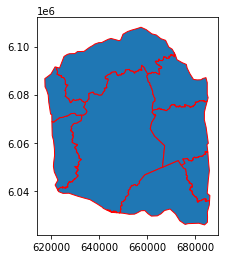

In [6]:
#intersecting Layers
districts_in_aoi = gpd.overlay(districts, area_of_interest, how= 'intersection')
districts_in_aoi.plot(edgecolor = 'red')

In [7]:
#CALCULATING THE AREA OF THE INTERSECTED LAYERS
#after creating column for AREA , divide it by 1000000 to convert it to Kmetre square
districts_in_aoi['area'] = districts_in_aoi.area/1000000

In [8]:
#EXPORTING GEOPANDAS GEODATAFRAME INTO ESRI SHAPEFILE
districts_in_aoi.to_file('districts_within_aoi.shp', drivers = "ESRI shapefile")